In [8]:
# import libraries

import os
import numpy as np
import pandas as pd

import xarray as xr
import rioxarray as rioxr

import matplotlib.pyplot as plt

In [13]:
# import data
lulc_fp = os.path.join(os.getcwd(), 
                      'data',
                      'land_cover.tif')

# open file
lulc = rioxr.open_rasterio(lulc_fp)

class_names = pd.read_csv('data/GAP_National_Terrestrial_Ecosystems.csv')

CRS: EPSG:5070


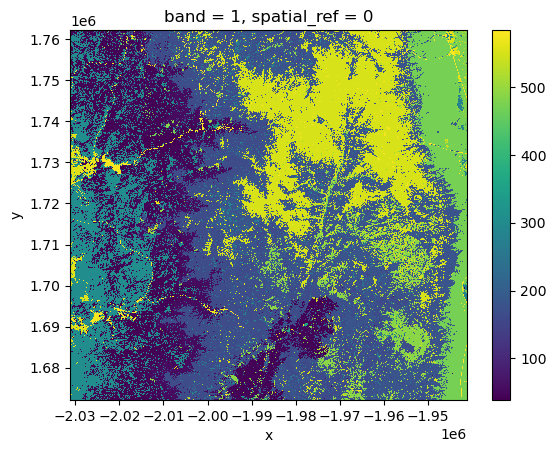

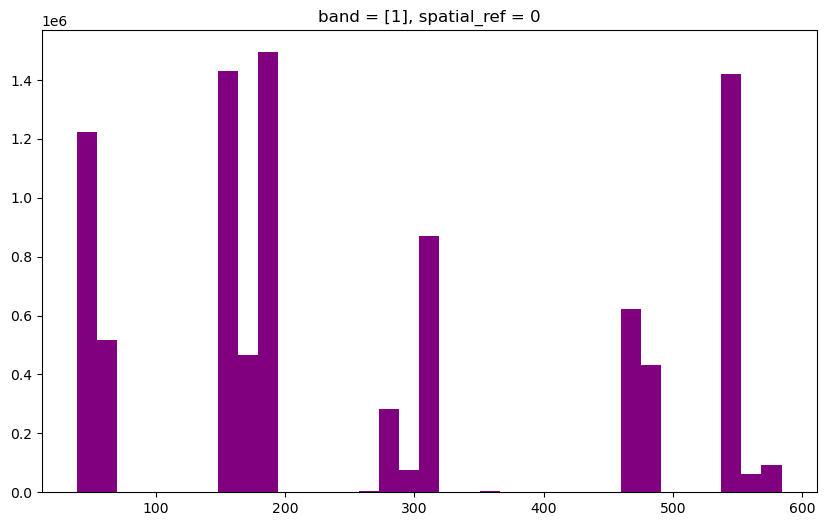

In [14]:
# this is wgs84 epsg
print('CRS:', lulc.rio.crs)

lulc.plot()

fig, ax = plt.subplots(figsize=(10, 6))
lulc.plot.hist(ax = ax,
            bins = 35,
            color = "purple")
plt.show()

In [25]:
np.unique(lulc, return_counts = True)

In [59]:
# make dictionary of columns wanted
pix_counts = {'code' : np.unique(lulc, return_counts = True)[0],
              'pix' : np.unique(lulc, return_counts = True)[1]
             }

# make into dataframe
pix_counts = pd.DataFrame(pix_counts)

pix_counts

,code,pix
0,39,639385
1,42,584143
2,56,518722
3,146,157
4,148,121486
...,...,...
56,579,36052
57,581,40296
58,582,12947
59,583,1955


In [60]:
# left join the data frames by 'code'
classes = pd.merge(pix_counts, 
                   class_names, 
                   how = 'left')
classes

,code,pix,class_label
0,39,639385,California Central Valley Mixed Oak Savanna
1,42,584143,California Lower Montane Blue Oak-Foothill Pin...
2,56,518722,Mediterranean California Mixed Oak Woodland
3,146,157,Inter-Mountain Basins Subalpine Limber-Bristle...
4,148,121486,Rocky Mountain Aspen Forest and Woodland
...,...,...,...
56,579,36052,Open Water (Fresh)
57,581,40296,"Developed, Open Space"
58,582,12947,"Developed, Low Intensity"
59,583,1955,"Developed, Medium Intensity"


In [78]:
# sum the number of pixels
total_pixels = pix_counts.pix.sum()

# add percent column
classes['percent'] = round((classes.pix/total_pixels)*100, 8)

classes.percent.sum()

# check if these match
(np.unique(lulc, return_counts = True)[1]).sum() == pix_counts.pix.sum()
classes

,code,pix,class_label,percent
0,39,639385,California Central Valley Mixed Oak Savanna,7.104278
1,42,584143,California Lower Montane Blue Oak-Foothill Pin...,6.490478
2,56,518722,Mediterranean California Mixed Oak Woodland,5.763578
3,146,157,Inter-Mountain Basins Subalpine Limber-Bristle...,0.001744
4,148,121486,Rocky Mountain Aspen Forest and Woodland,1.349844
...,...,...,...,...
56,579,36052,Open Water (Fresh),0.400578
57,581,40296,"Developed, Open Space",0.447733
58,582,12947,"Developed, Low Intensity",0.143856
59,583,1955,"Developed, Medium Intensity",0.021722


In [81]:
over_1_lulc = classes[classes.percent > 1][['class_label', 'percent']]
over_1_lulc

,class_label,percent
0,California Central Valley Mixed Oak Savanna,7.104278
1,California Lower Montane Blue Oak-Foothill Pin...,6.490478
2,Mediterranean California Mixed Oak Woodland,5.763578
4,Rocky Mountain Aspen Forest and Woodland,1.349844
5,California Montane Jeffrey Pine-(Ponderosa Pin...,5.849011
7,Mediterranean California Mesic Mixed Conifer F...,8.488333
10,Mediterranean California Red Fir Forest,3.349644
12,Northern California Mesic Subalpine Woodland,1.411744
13,Sierra Nevada Subalpine Lodgepole Pine Forest ...,9.217544
14,Great Basin Pinyon-Juniper Woodland,7.375144


<AxesSubplot:ylabel='class_label'>

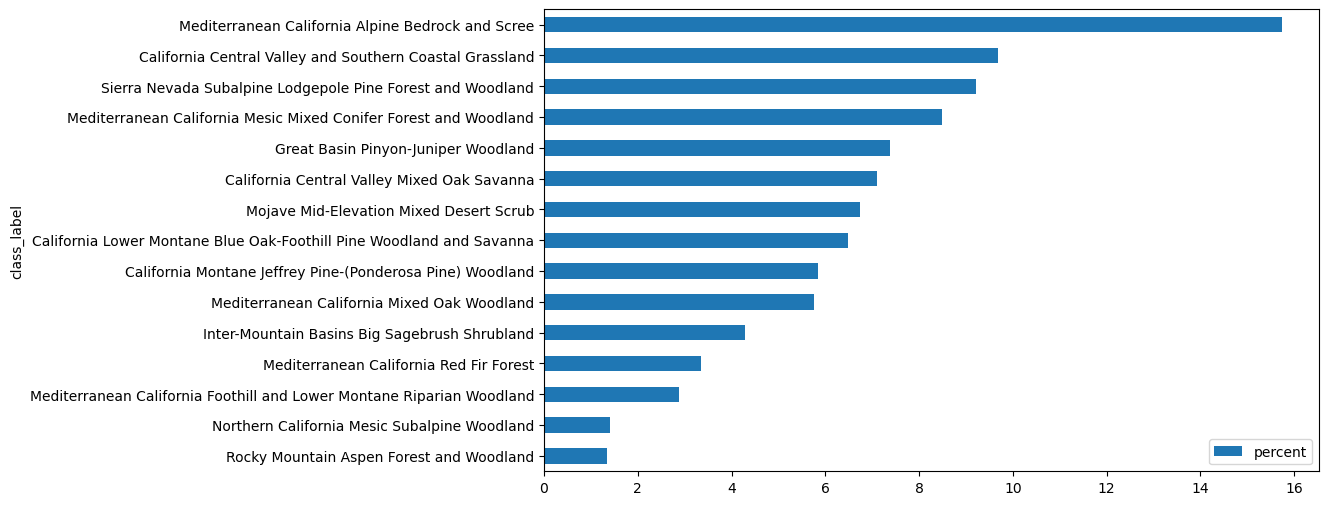

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
over_1_lulc.sort_values('percent', # sort by percent
                        ascending = True).plot(kind = 'barh', # horizonatal bars
                                              ax = ax,
                                              x = 'class_label')

True